In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install tensorflow-gpu

     |████████████████████████████████| 458.3 MB 12 kB/s 


In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
#train_path = '/content/drive/MyDrive/Mustafiz_Mount_folder/Cotton_Image/train'
train_path='/content/drive/MyDrive/Mustafiz_Mount_folder/Citrus_Datasets/train'
#valid_path = '/content/drive/MyDrive/Mustafiz_Mount_folder/Cotton_Image/val',

valid_path = '/content/drive/MyDrive/Mustafiz_Mount_folder/Citrus_Datasets/validation',

In [7]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [8]:
for layer in inception.layers:
    layer.trainable = False

In [9]:
folders = glob('/content/drive/MyDrive/Mustafiz_Mount_folder/Citrus_Datasets/train/*')

In [10]:
x = Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# view the structure of the model
# model.summary()

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Mustafiz_Mount_folder/Citrus_Datasets/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 720 images belonging to 9 classes.


In [16]:
validation_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Mustafiz_Mount_folder/Citrus_Datasets/validation/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 180 images belonging to 9 classes.


In [17]:
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=validation_set,
  # epochs=65,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

Epoch 1/100
23/23 [==============================] - 701s 29s/step - loss: 5.3618 - accuracy: 0.6167 - val_loss: 2.2205 - val_accuracy: 0.8111
Epoch 2/100
23/23 [==============================] - 143s 6s/step - loss: 0.6719 - accuracy: 0.9125 - val_loss: 0.6255 - val_accuracy: 0.9111
Epoch 3/100
23/23 [==============================] - 142s 6s/step - loss: 0.3830 - accuracy: 0.9528 - val_loss: 0.5595 - val_accuracy: 0.9111
Epoch 4/100
23/23 [==============================] - 139s 6s/step - loss: 0.4992 - accuracy: 0.9486 - val_loss: 1.6536 - val_accuracy: 0.9000
Epoch 5/100
23/23 [==============================] - 140s 6s/step - loss: 0.4859 - accuracy: 0.9431 - val_loss: 1.0646 - val_accuracy: 0.8722
Epoch 6/100
23/23 [==============================] - 140s 6s/step - loss: 0.4726 - accuracy: 0.9417 - val_loss: 0.2266 - val_accuracy: 0.9444
Epoch 7/100
23/23 [==============================] - 140s 6s/step - loss: 0.5466 - accuracy: 0.9486 - val_loss: 0.2695 - val_accuracy: 0.9611
Epoch

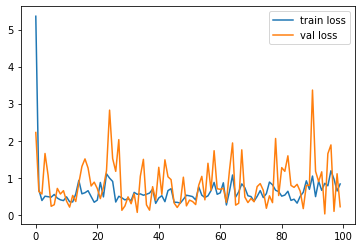

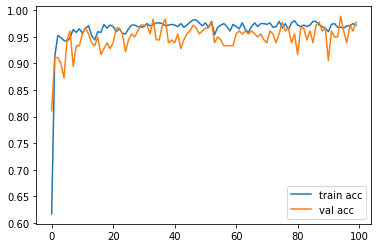

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Mustafiz_Mount_folder/Citrus_Datasets/mustafiz_citrus_tranferleraning1.h5')